In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [3]:
claims = pd.read_csv(r'/Users/khushboochheda/Desktop/DataScience/Python/Case_Study/case_study5/claims.csv')
cust_data = pd.read_csv(r'/Users/khushboochheda/Desktop/DataScience/Python/Case_Study/case_study5/cust_demographics.csv')

In [4]:
claims.shape

(1100, 10)

In [5]:
cust_data.shape

(1085, 6)

In [6]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No


In [7]:
cust_data.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [8]:
claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [9]:
cust360 = pd.merge(left=claims, right=cust_data, left_on= 'customer_id', right_on='CUST_ID', how = 'inner')

In [10]:
cust360.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [11]:
cust360.shape

(1085, 16)

2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [12]:
cust360.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [13]:
cust360['claim_date'] = pd.to_datetime(cust360['claim_date'], format='%m/%d/%Y')

In [14]:
cust360['DateOfBirth'] = pd.to_datetime(cust360['DateOfBirth'], format='%d-%b-%y')

In [15]:
cust360.loc[(cust360.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust360[cust360.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [16]:
cust360.describe()

,claim_id,customer_id,total_policy_claims,CUST_ID
count,1.085000e+03,1.085000e+03,1075.000000,1.085000e+03
mean,4.891553e+07,5.076790e+07,1.586977,5.076790e+07
std,2.912818e+07,2.849625e+07,1.146859,2.849625e+07
min,2.683200e+04,1.545570e+05,1.000000,1.545570e+05
25%,2.404606e+07,2.645062e+07,1.000000,2.645062e+07
50%,4.855975e+07,4.975949e+07,1.000000,4.975949e+07
75%,7.404400e+07,7.609396e+07,2.000000,7.609396e+07
max,9.977548e+07,9.996199e+07,8.000000,9.996199e+07


3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [17]:
cust360['claim_amount'] = cust360['claim_amount'].astype(str)

In [18]:
cust360['claim_amount'] = cust360.claim_amount.str.replace('$','')

/var/folders/k3/fjnr394n4pd95j1d6xr2f4cw0000gn/T/ipykernel_25706/2489668104.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust360['claim_amount'] = cust360.claim_amount.str.replace('$','')


In [19]:
cust360['claim_amount'] = np.where(cust360.claim_amount=='nan','',cust360.claim_amount)

In [20]:
cust360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver


In [21]:
cust360['claim_amount'] = pd.to_numeric(cust360['claim_amount'])

In [22]:
cust360.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [23]:
cust360['unreported_police'] = np.where(cust360.police_report == 'Unknown',1,0)

In [24]:
cust360.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_police
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1


5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [25]:
cust360 = cust360.drop_duplicates(subset='customer_id',keep='last')

6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [26]:
cust360.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
unreported_police       0
dtype: int64

In [27]:
cust360['claim_amount'] = cust360.claim_amount.replace(np.nan,cust360.claim_amount.mean())

In [28]:
cust360.claim_amount.isna().sum()

0

In [29]:
cust360['total_policy_claims'] = cust360.total_policy_claims.fillna(cust360.total_policy_claims.mode()[0])

In [30]:
cust360.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
unreported_police      0
dtype: int64

7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children Youth Adult Senior
< 18 
18-30 
30-60 
greater than 60

In [31]:
current_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(cust360['DateOfBirth']).year         
x = dob_year-100                                               
v = current_year - x
y = current_year - dob_year
cust360['age'] = (np.where(dob_year > current_year,v,y))

In [32]:
#categorising(binning)
cust360.loc[(cust360.age < 18),'AgeGroup'] = 'Children'
cust360.loc[(cust360.age >=18) & (cust360.age <30),'AgeGroup'] = 'Youth'
cust360.loc[(cust360.age >=30) & (cust360.age <60),'AgeGroup'] = 'Adult'
cust360.loc[(cust360.age >=60),'AgeGroup'] = 'Senior'

In [33]:
cust360.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_police,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,52,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1,36,Adult
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,45,Adult


8. What is the average amount claimed by the customers from various segments?

In [34]:
round(cust360.groupby(['Segment'])[['claim_amount']].mean(),2)

,claim_amount
Segment,
Gold,12846.39
Platinum,12371.64
Silver,12267.15


9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [35]:
incident_amt = round(cust360.loc[cust360.claim_date < '2018-09-10' ,:].groupby('incident_cause')[['claim_amount']].sum(),2)

In [36]:
incident_amt

,claim_amount
incident_cause,
Crime,721937.45
Driver error,3315847.88
Natural causes,1312744.91
Other causes,3723147.30
Other driver error,3277533.37


10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [37]:
cust360.loc[cust360.incident_cause.str.lower().str.contains('driver')& (cust360.State == 'TX')| (cust360.State == 'DE')|
           (cust360.State == 'AK')].groupby('State')[['claim_amount']].count()

,claim_amount
State,
AK,19
DE,29
TX,10


11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [38]:
agg_value = cust360.groupby(['Segment','gender'])[['claim_amount']].sum()

In [39]:
agg_value

claim_amount
Segment  gender              
Gold     Female  2.110042e+06
         Male    2.655967e+06
Platinum Female  2.369720e+06
         Male    2.096443e+06
Silver   Female  1.897302e+06
         Male    2.347131e+06

In [40]:
agg_value_pivot = agg_value.pivot_table(index='Segment', columns= 'gender', aggfunc='sum', values='claim_amount')

In [41]:
agg_value_pivot

gender,Female,Male
Segment,,
Gold,2.110042e+06,2.655967e+06
Platinum,2.369720e+06,2.096443e+06
Silver,1.897302e+06,2.347131e+06


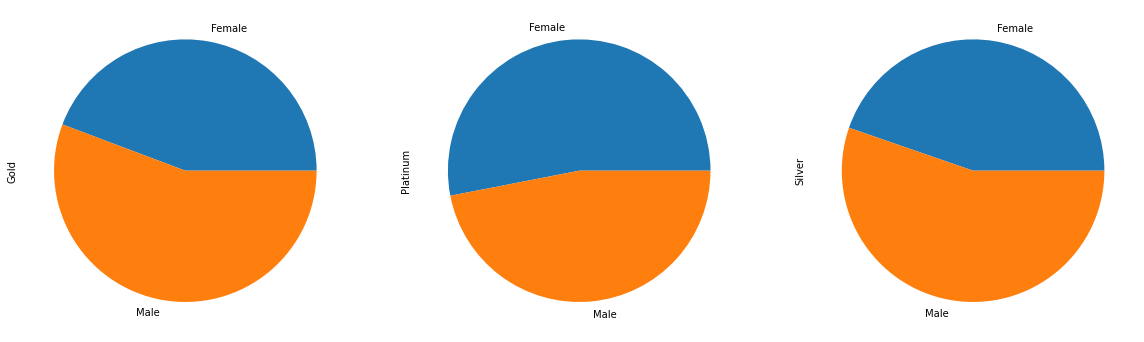

In [42]:
agg_value_pivot.T.plot(kind = 'pie',subplots= True, legend= False,figsize=(20,10))
plt.show()

12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [43]:
driver_issue = cust360.loc[cust360.incident_cause.str.lower().str.contains('driver')].groupby(['gender'])[['gender']].count().add_prefix('count_of_').reset_index()

In [44]:
driver_issue

,gender,count_of_gender
0,Female,221
1,Male,281


[]

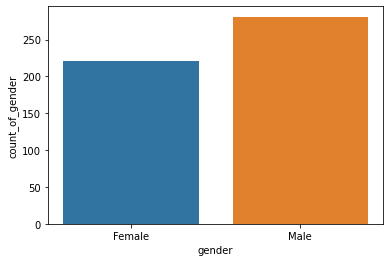

In [45]:
sns.barplot(x= "gender", y= "count_of_gender", data= driver_issue)
plt.plot()

13 Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [46]:
cust360["Frauds"]= np.where(cust360.fraudulent == "Yes",1,0)

In [47]:
Agewise_frauds= cust360.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
Agewise_frauds

,AgeGroup,Frauds
0,Adult,185
1,Senior,21
2,Youth,39


[]

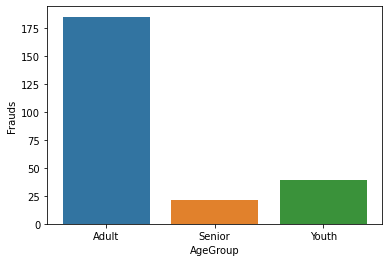

In [48]:
sns.barplot(x= 'AgeGroup', y= 'Frauds', data= Agewise_frauds)
plt.plot()

14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [49]:
cust360['month'] = pd.to_datetime(cust360['claim_date'])

In [50]:
cust360['Month'] = cust360['month'].dt.month

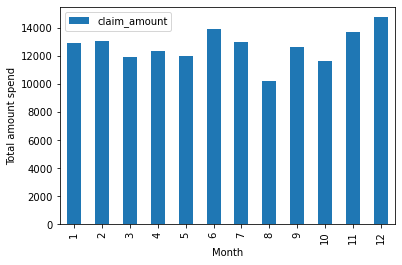

In [51]:
cust360.pivot_table(index= 'Month', values= 'claim_amount').plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [52]:
Frauds_gender= pd.DataFrame(cust360.loc[(cust360.fraudulent=="Yes")].groupby(["gender","AgeGroup"])
                            [["claim_amount"]].mean().add_prefix("Fraud_"))

In [53]:
Non_Frauds_gender= pd.DataFrame(cust360.loc[(cust360.fraudulent=="No")].groupby(["gender","AgeGroup"])
                            [["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [54]:
Claims_age_gender=round(pd.merge(Frauds_gender,Non_Frauds_gender, on=["gender","AgeGroup"]),2)

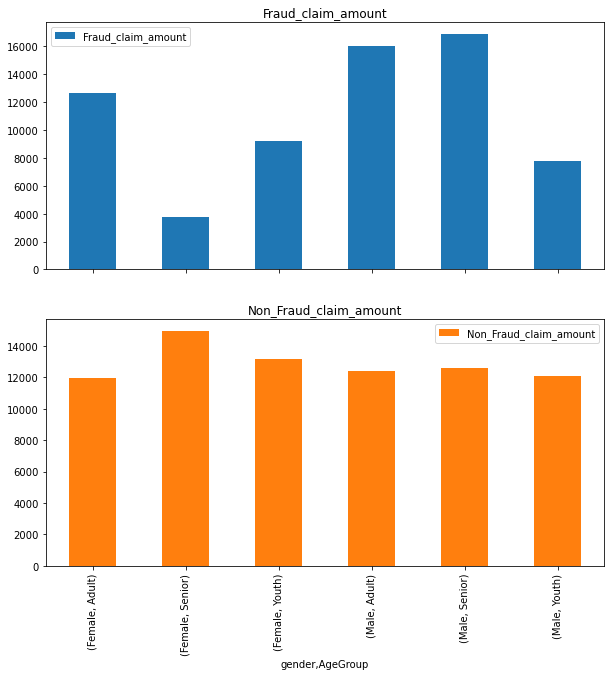

In [55]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

In [56]:
import scipy.stats as stats

16. Is there any similarity in the amount claimed by males and females?

In [57]:
claim_male = cust360['claim_amount'].loc[cust360['gender']== 'Male']

In [58]:
claim_female = cust360['claim_amount'].loc[cust360['gender']== 'Male']

In [59]:
claim_male.mean()

12884.829631308425

In [60]:
claim_female.mean()

12884.829631308425

In [61]:
# Two sample t-test:
# To conduct a valid test: (Assumptions for two sample t-test) 
# * Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
# * Data in each group must be obtained via a random sample from the population.
# * Data in each group are normally distributed.
# * Data values are continuous.
# * The variances for the two independent groups are equal.

In [62]:
# checking variance

In [63]:
eq_var = stats.ttest_ind(a= claim_male, b= claim_female, equal_var= True)

In [64]:
eq_var.statistic

0.0

In [65]:
uneq_var = stats.ttest_ind(a= claim_male, b= claim_female, equal_var= False)

In [66]:
uneq_var.statistic

0.0

In [67]:
t = eq_var.statistic

In [68]:
p = eq_var.pvalue

In [69]:
print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

 For the above test, the t-score is 0.0 and the p-value is 1.0


In [70]:
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


In [71]:
# As the significance value of t test is greater than 0.05 we can safely conclude 
# that there is a similarity in amount claimed by males and females.

17. Is there any relationship between age category and segment?

In [72]:
# since age and segment are categorical variables therefore to check relationship between age and segment we use chi-square method

In [73]:
#H0 = there is no relation
#Ha = there is relation

In [74]:
age_segment = pd.crosstab(cust360.AgeGroup, cust360.Segment, margins=True)
age_segment

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,272,266,257,795
Senior,28,26,21,75
Youth,71,69,68,208
All,371,361,346,1078


In [75]:
chi_test = stats.chi2_contingency(observed= age_segment)
chi_test

(0.6654696397990999,
 0.999896981610665,
 9,
 array([[ 273.6038961 ,  266.22912801,  255.16697588,  795.        ],
        [  25.81168831,   25.11595547,   24.07235622,   75.        ],
        [  71.58441558,   69.65491651,   66.7606679 ,  208.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [76]:
print("The chi square stat is {} and the p value is {}".format(chi_test[0],chi_test[1]))

The chi square stat is 0.6654696397990999 and the p value is 0.999896981610665


In [77]:
#since the p-value > 0.05, we cannot reject null hypothesis therefore there is no relationship between Age and segment

18. The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.

In [78]:
# since here we have one sample and one hupothetical mean, we use ttest_1sample

In [79]:
# H0 = no relation
# Ha = there exists relation

In [80]:
cust360['year'] = cust360.month.dt.year

In [97]:
Current_year= cust360.loc[cust360.year == 2018]["claim_amount"]

In [101]:
ttest= stats.ttest_1samp(Current_year,10000)

In [104]:
p_value = ttest.pvalue

In [105]:
if(p_value<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We reject null hypothesis


In [106]:
#since , p-value < 0.05, there is increase in average compared to 2016-17

19. Is there any difference between age groups and insurance claims?

In [82]:
# here there is one categorical variable i.e age groups whereas insurance claims is numerical variable, 
# therefore we use f-test
# H0 = average are equal
# Ha = atleast one average is different from other samples

In [83]:
cust360.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,...,State,Contact,Segment,unreported_police,age,AgeGroup,Frauds,month,Month,year
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,...,VT,789-916-8172,Platinum,0,43,Adult,0,2017-11-27,11,2017
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,...,ME,265-543-1264,Silver,1,52,Adult,0,2018-10-03,10,2018
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,...,TN,798-631-4758,Silver,0,38,Adult,0,2018-04-04,4,2018


In [84]:
age_claims_Y = cust360['total_policy_claims'].loc[cust360['AgeGroup']== 'Youth']

In [85]:
age_claims_A = cust360['total_policy_claims'].loc[cust360['AgeGroup']== 'Adult']

In [86]:
f_test = stats.f_oneway(age_claims_Y,age_claims_A)

In [87]:
f = f_test.statistic

In [88]:
p = f_test.pvalue

In [89]:
print("The f-value is {} and the p value is {}".format(f,p))

The f-value is 0.9080839705107974 and the p value is 0.34085335479229917


In [90]:
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


In [91]:
# here since the p-value is not less than 0.05, therefore null hypothesis is 
# not rejected and hence there is no influence of age in claims

20. Is there any relationship between total number of policy claims and the claimed amount?

In [92]:
# here we find correlation to find relationship

In [93]:
cust360['total_policy_claims'] = pd.to_numeric(cust360['total_policy_claims'])

In [94]:
cust360.total_policy_claims.corr(cust360.claim_amount)

-0.022392720732099892

In [95]:
# since correlation is negative thus there is no relation between number of policy claims and claim amount